In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import ADASYN
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [50]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').values.ravel()
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').values.ravel()

# Logistic Regression

In [37]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(LogisticRegression(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\mo

{'max_iter': 3000, 'penalty': 'l2', 'solver': 'sag'}

In [4]:
gscv.score(X_train, y_train)

0.8390032826022082

In [32]:
lr = LogisticRegression(max_iter=3000, penalty='l2', solver='sag')
lr.fit(X_train,y_train).score(X_train, y_train)

0.8390032826022082

In [33]:
accuracy_score(y_train, lr.predict(X_train))

0.8390032826022082

In [34]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.37


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.37')

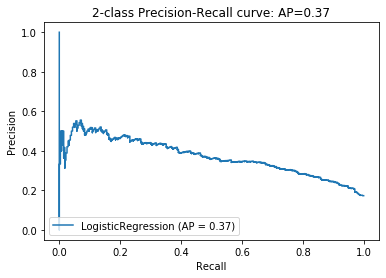

In [35]:
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [36]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,gender,-0.232496
1,age,-0.018463
2,age_o,-0.018463
3,int_corr,0.207551
4,samerace,-0.057387
5,date,-0.118414
6,exphappy,-0.023419
7,attr3_1,0.078431
8,sinc3_1,0.015393
9,fun3_1,-0.032707


# Support Vector Machine

In [25]:
# This ran for almost an hour

# params = {'C': [.1, 1, 10],
#           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# gscv = GridSearchCV(SVC(), params, cv=3)
# gscv.fit(X_train, y_train)
# gscv.best_params_

{'C': 10, 'kernel': 'poly'}

In [74]:
svc = SVC(C=10, kernel='poly')
svc.fit(X_train,y_train).score(X_train, y_train)

0.841987466427932

In [75]:
accuracy_score(y_test, svc.predict(X_test))

0.834128878281623

In [27]:
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

0.834128878281623

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.35')

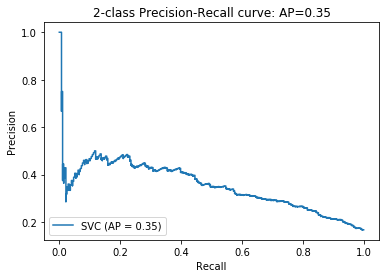

In [29]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Does preferences matter?
If we drop the preferences features, the model performs just as well.

In [38]:
X_train_2 = X_train.drop(X_train.loc[:,'attr1_1':'pf_o_sha'].head(0).columns, axis=1)
X_test_2 = X_test.drop(X_test.loc[:,'attr1_1':'pf_o_sha'].head(0).columns, axis=1)

In [39]:
lr = LogisticRegression(max_iter=3000, penalty='l2', solver='sag')
lr.fit(X_train_2,y_train).score(X_train_2, y_train)

0.8379588182632051

In [40]:
svc = SVC(C=10, kernel='poly')
svc.fit(X_train_2,y_train).score(X_train-2, y_train)

0.8352730528200537

# k-Nearest Neighbor

In [48]:
params = {'n_neighbors': [3, 5, 10],
          'p': [1, 2]}

gscv = GridSearchCV(KNeighborsClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'n_neighbors': 10, 'p': 1}

In [49]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(X_train, y_train).score(X_train, y_train)

0.8475082065055207

# Decision Tree

In [55]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 7, 10, 12, 15, 25]}

gscv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [56]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X_train,y_train).score(X_train, y_train)

0.8352730528200537

# Random Forest

In [64]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(RandomForestClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 150}

In [65]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=150)
rfc.fit(X_train,y_train).score(X_train, y_train)

1.0

In [66]:
rfc.score(X_test, y_test)

0.8418854415274463

Average precision-recall score: 0.21


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

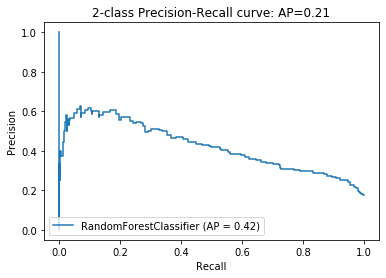

In [80]:
y_score = rfc.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Gradient Boosting

In [81]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [83]:
gbc = GradientBoostingClassifier(max_depth=5)
gbc.fit(X_train,y_train).score(X_train, y_train)

0.9122649955237243

Average precision-recall score: 0.44


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.44')

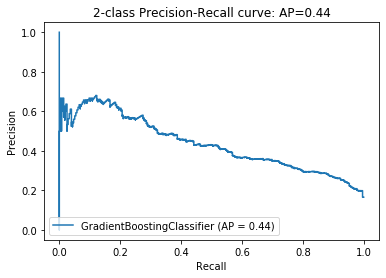

In [84]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# XGBoost

In [92]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [3, 5, 10]}

gscv = GridSearchCV(XGBClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [93]:
xgb = XGBClassifier(max_depth=5, n_estimators=150)
xgb.fit(X_train, y_train).score(X_train, y_train)

0.9051029543419875

Average precision-recall score: 0.26


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.26')

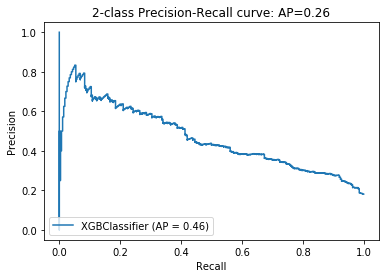

In [94]:
y_score = xgb.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(xgb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Stacking

In [72]:
ensemble = [LogisticRegression(),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression())
stc.fit(X_train,y_train).score(X_train, y_train)

F:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8589973142345568

# Oversampling

In [95]:
X_train_r, y_train_r = ADASYN().fit_sample(X_train, y_train)

In [96]:
gbc = GradientBoostingClassifier(max_depth=5)
gbc.fit(X_train_r,y_train_r).score(X_train_r, y_train_r)

0.9345341501325775

Average precision-recall score: 0.44


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.44')

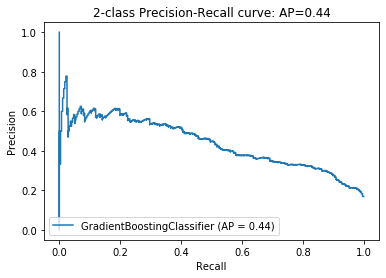

In [97]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))